In [223]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

In [43]:
from python.utils.utils import plot_heatmap_scipy, draw_scanpath, draw_target

## Import data

In [123]:
fixations = pd.read_csv(os.path.join("data", "vsgui10k_fixations.csv"))
targets = pd.read_csv(os.path.join("data", "vsgui10k_targets.csv"))

## Image types

The experiment consists of four screens: target description, fixation cross, visual search and validation. When using the data, make sure to filter the ```img_type``` variable correctly.

<img src="../../images/task-image/fig2-trial.png" alt="One trial" width="700">

In [8]:
img_type_mappings = {0: "Task description", 1: "Fixation cross", 2: "Visual search", 3: "Validation"}

To illustrate, in the validation screen when targets are absent the fixations concentrate in the lower right corner as the red box indicating absence was placed there.

<Axes: title={'center': 'Image type: Validation'}>

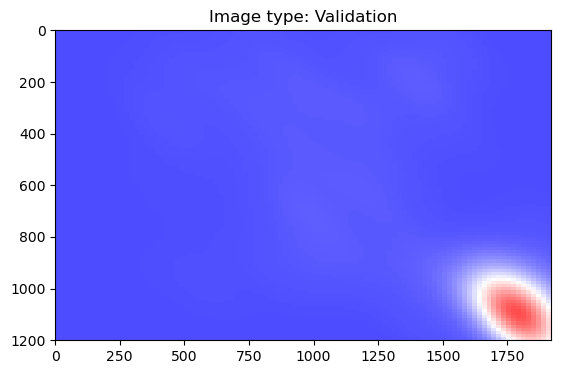

In [17]:
IMG_TYPE = 3 # 0 = target description, 1 = fixation cross, 2 = visual search, 3 = validation
CATEGORY = "web" # One of web, mobile, desktop
ABSENT = True # True, False
MIN_FIXATION = 0 

fig,ax = plt.subplots(1,1)

ax.set_title(f"Image type: {img_type_mappings[IMG_TYPE]}")

plot_heatmap_scipy(fixations[(fixations.img_type == IMG_TYPE) & (fixations.category == CATEGORY) & (fixations.absent == ABSENT) & (fixations.FPOGID > MIN_FIXATION)], ax, scatter=False, return_density_max=False, xmax=1920, ymax=1200)

The fixation crosses, on the other hand, are concentrated at the center of the screen.

<Axes: title={'center': 'Image type: Fixation cross'}>

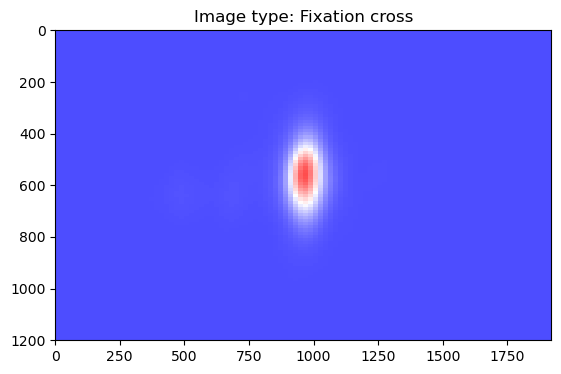

In [19]:
IMG_TYPE = 1 # 0 = target description, 1 = fixation cross, 2 = visual search, 3 = validation
CATEGORY = "web" # One of web, mobile, desktop
ABSENT = True # True, False
MIN_FIXATION = 0 

fig,ax = plt.subplots(1,1)

ax.set_title(f"Image type: {img_type_mappings[IMG_TYPE]}")

plot_heatmap_scipy(fixations[(fixations.img_type == IMG_TYPE) & (fixations.category == CATEGORY) & (fixations.absent == ABSENT) & (fixations.FPOGID > MIN_FIXATION)], ax, scatter=False, return_density_max=False, xmax=1920, ymax=1200)

Visual search trials are spread according to the search patterns of the participants. Note the difference between filtering out the first fixation below; the trials always started at the center of the screen.

<Axes: title={'center': 'Image type: Visual search'}>

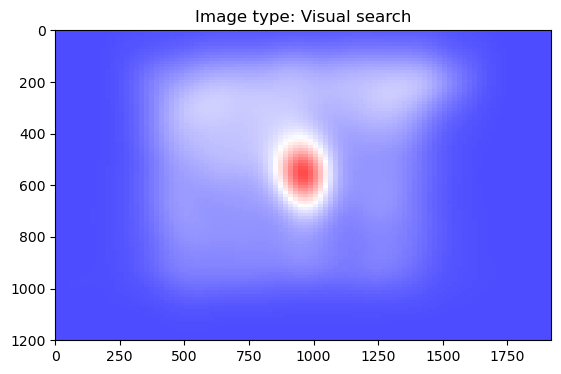

In [20]:
IMG_TYPE = 2 # 0 = target description, 1 = fixation cross, 2 = visual search, 3 = validation
CATEGORY = "web" # One of web, mobile, desktop
ABSENT = False # True, False
MIN_FIXATION = 0 

fig,ax = plt.subplots(1,1)

ax.set_title(f"Image type: {img_type_mappings[IMG_TYPE]}")

plot_heatmap_scipy(fixations[(fixations.img_type == IMG_TYPE) & (fixations.category == CATEGORY) & (fixations.absent == ABSENT) & (fixations.FPOGID > MIN_FIXATION)], ax, scatter=False, return_density_max=False, xmax=1920, ymax=1200)

<Axes: title={'center': 'Image type: Visual search'}>

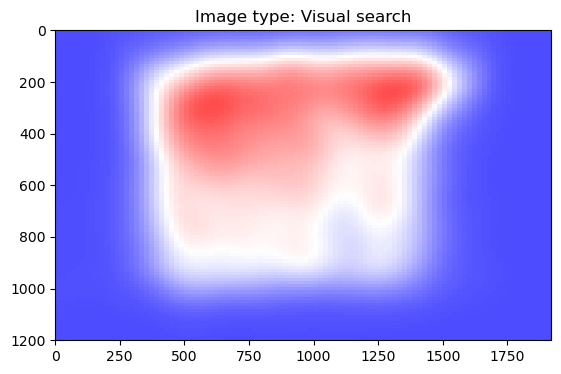

In [21]:
IMG_TYPE = 2 # 0 = target description, 1 = fixation cross, 2 = visual search, 3 = validation
CATEGORY = "web" # One of web, mobile, desktop
ABSENT = False # True, False
MIN_FIXATION = 2 

fig,ax = plt.subplots(1,1)

ax.set_title(f"Image type: {img_type_mappings[IMG_TYPE]}")

plot_heatmap_scipy(fixations[(fixations.img_type == IMG_TYPE) & (fixations.category == CATEGORY) & (fixations.absent == ABSENT) & (fixations.FPOGID > MIN_FIXATION)], ax, scatter=False, return_density_max=False, xmax=1920, ymax=1200)

## Fixation coordinates (FPOG)

Note that the data contains three different types of (x,y) coordinates for the fixation data:

1) ```FPOGX``` and ```FPOGY```: raw data from Gazepoint, which is collected for the trials, i.e. not in screenshot coordinates.
2) ```FPOGX_debias``` and ```FPOGY_debias```: debiased data, where fixation cross is used in corrections where available.
3) ```FPOGX_scaled``` and ```FPOGY_scaled```: scaled data, which is expressed in screenshot coordinates.

These three types are illustrated below for a random sample.

In [ ]:
random_row = fixations[fixations.index == np.random.choice(len(fixations))]

pid = random_row.pid.item()
tgt_id = random_row.tgt_id.item()

sample = fixations[(fixations.pid == pid) & (fixations.tgt_id == tgt_id) & (fixations.img_type == 2)]

In [ ]:
def plot_scales(test : bool, sample : pd.DataFrame):

    if test:
        scale = True
    else:
        scale = False

    img_name = np.unique(sample.img_name)[0]
    img_path = os.path.join("data", "vsgui10k-images", img_name)
    scale_x = np.unique(sample.scale_x)[0]
    scale_y = np.unique(sample.scale_y)[0]

    left = (1 - scale_x) / 2
    top = (1 - scale_y) / 2

    fig, axs = plt.subplots(1,3, figsize=(13,5))

    titles = ["Raw data", "Debiased", "Scaled"]

    for index, data_types in enumerate((["FPOGX", "FPOGY"], ["FPOGX_debias", "FPOGY_debias"], ["FPOGX_scaled", "FPOGY_scaled"])):

        ax = axs[index]
        xs = sample[data_types[0]]
        ys = sample[data_types[1]]
        ts = sample.FPOGD
        ax.set_title(titles[index])

        if test:
            img_path = os.path.join("images", "test.png")
            
            # Create a rectangle patch
            rect = patches.Rectangle((left * 1980, top * 1200), scale_x * 1980, scale_y * 1200, linewidth=1, edgecolor='r', facecolor='none')

            # Add the rectangle to the plot
            ax.add_patch(rect)

        img = draw_scanpath(xs=np.array(xs), ys=np.array(ys), ts=np.array(ts), img_path=img_path, ax = ax)
        img = draw_target(img_name = img_name, tgt_id = tgt_id, img=img, df=targets, ax=ax, scale=scale)

These three panes show what the "unscaled" results look like for the visual search windows. As expected, most of the fixations fall inside the bounding box of the screenshot in red.

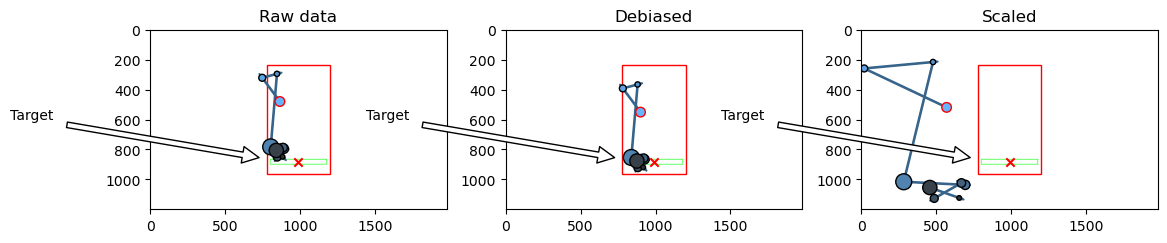

In [ ]:
plot_scales(test = True, sample = sample)

The below image triplet shows the same data for screenshots. The "Raw data" and "Debiased" data appears to be scaled wrong, while the "Scaled" output spans the whole screenshot. You'd expect the Raw data / Debiased output above, and the Scaled output below to match.

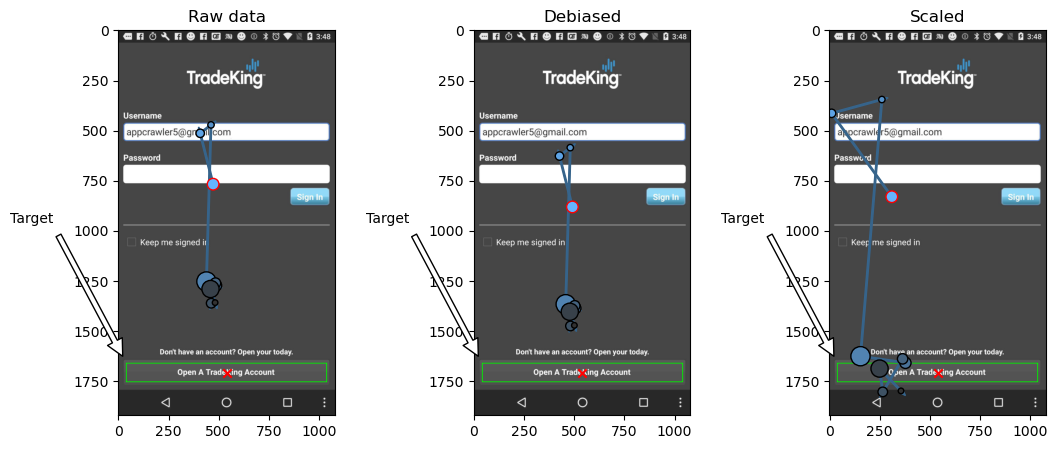

In [ ]:
plot_scales(test=False, sample=sample)